In [18]:
import numpy as np
import pandas as pd
import math
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from astropy.io import ascii

In [19]:
def ValentiNebFit(MNi,Fs,tstart,fulltrap=False):
  #variables
   # Mej_sol = 5  #1-10 solar masses
   # Ek_51 =  2e51  #1e51 ergs
   # Fs = (32*Mej_sol)/math.sqrt(Ek_51)
    #MNi = 2 # mass of nickel ranges from 0.1-2
    #tstart = 150

  #constants
    M_sun = 2e33
    c = 3e10
    tau_Ni = 8.8*86400  #decay time of Ni56 in sec
    tau_Co=9.822e6   #decay time of Co56 in sec
    e_Ni=3.90e10   # erg/s/g energy produced by 1 gram of Ni
    e_Co=6.78e9   #erg/s/g energy produced by 1 gram of Co
    
    
    #Parameters
    M_Ni = MNi*M_sun
    F = Fs
    G = 16.1*F

    # time vector in days starting at tstart days post-explosion.
    dt = (np.arange(tstart,500,1))#*86400.
    
#equations;;;;;;;;;;;;;;;;;

    #Nickel source term
    S_Ni = M_Ni*e_Ni*np.exp(-(dt*86400.)/tau_Ni)

    #Cobalt Source terms:
    Epsilon = M_Ni*e_Co*(np.exp(-(dt*86400.)/tau_Co) - np.exp(-(dt*86400.)/tau_Ni))

    S_Co1 = 0.81*Epsilon*(1-np.exp(-(F/dt)**2.))
    S_Co2 = 0.164*Epsilon*(1-np.exp(-(F/dt)**2.))*(1-np.exp(-(G/dt)**2.))
    S_Co3 = 0.036*Epsilon*(1-np.exp(-(G/dt)**2.))

    #Lum = np.zeros(len(dt))
    
    if fulltrap:
        S_Co1 = 0.81*Epsilon
        S_Co2 = 0.164*Epsilon
        S_Co3 = 0.036*Epsilon
    #Total Luminosity
    Lum = S_Ni + S_Co1 + S_Co2 + S_Co3  #This should be in erg/s
    
    return dt,Lum
    
#print(Lum)
#print(dt)    

In [167]:
Mej_sol = 20  #1-10 solar masses
Ek_51 =  12 #1e51 ergs
Fs = (32*Mej_sol)/math.sqrt(Ek_51)
#MNi = 2 # mass of nickel ranges from 0.1-2
#tstart = 150

print (Fs)


184.75208614068026


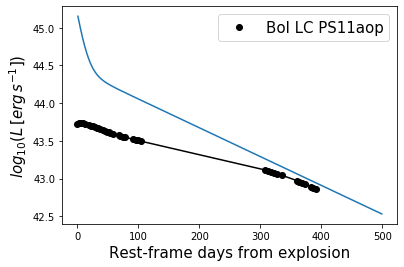

In [17]:
#ValentiNebFit(MNi,Fs,tstart)
dt, Lum  = ValentiNebFit(20,180,1,fulltrap=True)
#print(Lum)
plt.plot(dt,np.log10(Lum))
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['t']
luma = data1['lum']
lumerror =  data1['lum-error']
yerr =  lumerror
plt.errorbar(t,np.log10(luma),fmt = 'ko',label = 'Bol LC PS11aop')
plt.errorbar(t,np.log10(luma),fmt = 'k')
plt.xlabel('Rest-frame days from explosion',fontsize =15)
plt.ylabel(r'$log_{10} (\mathit{L}\,[erg\,s^{-1}])$', fontsize =15)
plt.legend(fontsize =15)

#plt.savefig('nickel-fulltrap2.pdf')
plt.show()


In [20]:
dt, Lum  = ValentiNebFit(5,180,1,fulltrap=True)
z = (dt, Lum)
np.savetxt('fulltrap5.csv',np.transpose(z), delimiter = ',')

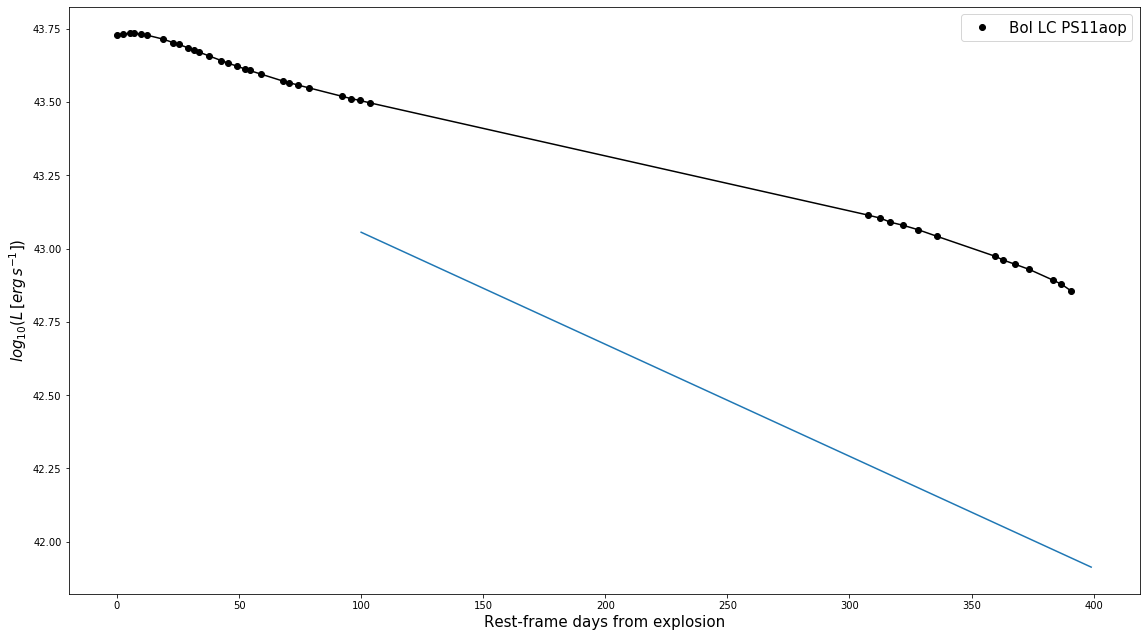

In [87]:
plt.figure(figsize=(19.20,10.80))
#plt.plot(time/86400.,np.log10(lum))#label = 'Nickel only')
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['t']
luma = data1['lum']
lumerror =  data1['lum-error']
yerr =  lumerror
plt.errorbar(t,np.log10(luma),fmt = 'ko',label = 'Bol LC PS11aop')
plt.errorbar(t,np.log10(luma),fmt = 'k')

file2='nifulltrapa.csv'
data2 = ascii.read(file2,format='csv')
dt = data2['dt']
Lum = data2['Lum']

plt.plot(dt/86400, np.log10(Lum))
plt.xlabel('Rest-frame days from explosion',fontsize =15)
plt.ylabel(r'$log_{10} (\mathit{L}\,[erg\,s^{-1}])$', fontsize =15)
plt.legend(fontsize =15)
plt.show()
#plt.savefig('nickel-fulltrap.pdf')